In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 5, 10

In [3]:
train = pd.read_csv("./train/train.csv")

In [4]:
test = pd.read_csv("./test/test.csv")

In [5]:
np.unique(train["targets"].values)

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [6]:
train.head()

,unique_id,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100,targets
0,0,0,0,0,1,0,-101.25,0,1,0,...,0,0,2.374118,0,0.0,0,3.588515,6,1.968998,4
1,1,0,0,0,0,0,-101.25,0,0,0,...,0,0,1.905289,0,0.0,3,0.726108,5,1.741416,5
2,2,0,0,0,0,0,-101.25,0,0,0,...,3,0,-1.861978,3,0.0,1,1.946937,10,0.986247,9
3,3,0,0,0,0,0,-101.25,0,0,0,...,1,0,5.944138,1,10.0,4,3.356318,7,0.645281,2
4,4,0,0,0,0,0,-101.25,0,0,0,...,0,0,0.534246,0,10.0,0,0.728621,8,1.254002,2


In [7]:
test.head()

,unique_id,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100
0,0,0,0,0,0,0,-101.25,0,3,0,...,0,0,0,-1.413349,0,90.000000,3,2.215353,8,0.719869
1,1,1,0,2,0,0,-101.25,0,0,1,...,0,1,0,5.202979,1,0.000000,0,1.478269,4,0.167478
2,2,0,0,0,0,0,-101.25,0,1,0,...,2,0,0,-0.516663,0,10.000000,2,3.915072,6,3.244433
3,3,1,2,1,1,0,-101.25,6,1,1,...,2,0,0,-5.457139,0,8.181818,2,0.863767,7,1.221847
4,4,0,2,0,0,0,-101.25,0,0,0,...,0,0,1,-3.922086,1,3.333333,2,4.989312,9,2.080833


In [4]:
features = [f for f in test.columns if "x_" in f]

In [5]:
y = train["targets"]

In [6]:
x = train[features]

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35950 entries, 0 to 35949
Columns: 102 entries, unique_id to targets
dtypes: float64(11), int64(91)
memory usage: 28.0 MB


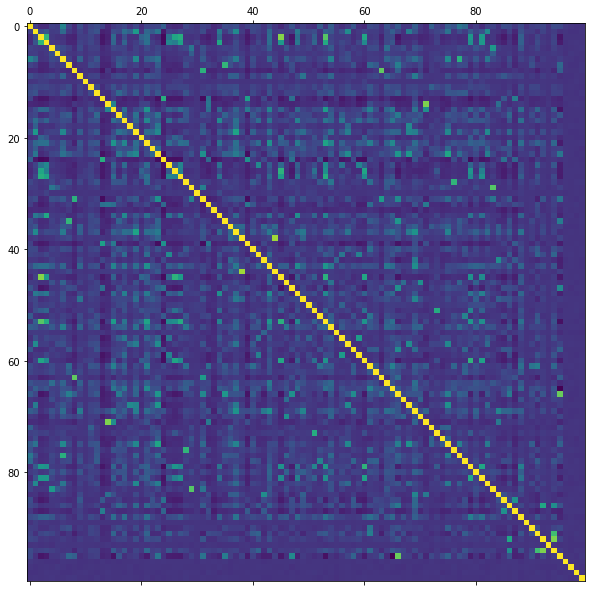

In [21]:
plt.matshow(x.corr())
plt.show()

In [22]:
from xgboost import XGBClassifier

In [27]:
model = XGBClassifier()

In [43]:
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [44]:
y_pred = model.predict(x_test)

In [47]:
y_pre = model.predict_proba(x_test)

In [42]:
from sklearn.metrics import accuracy_score,f1_score,auc,log_loss

In [33]:
accuracy_score(y_test,y_pred)

0.7653405259608901

In [48]:
log_loss(y_test,y_pre,labels=[1,2,3,4,5,6,7,8,9])

0.667247488460985

In [39]:
f1_score(y_test,y_pred,average="micro")

0.7653405259608901

In [49]:
model.fit(x,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [50]:
y_p = model.predict_proba(test[features])

In [61]:
a = pd.DataFrame(y_p,columns=['proba_1', 'proba_2', 'proba_3', 'proba_4', 'proba_5', 'proba_6', 'proba_7', 'proba_8', 'proba_9'])

In [53]:
a.head()

,proba_1,proba_2,proba_3,proba_4,proba_5,proba_6,proba_7,proba_8,proba_9
0,0.025382,0.029443,0.022163,0.007881,0.002905,0.005868,0.009761,0.070588,0.826008
1,0.062466,0.120135,0.044537,0.072757,0.006019,0.261168,0.040750,0.019169,0.373000
2,0.105314,0.303214,0.269813,0.041117,0.003005,0.038491,0.057774,0.115682,0.065589
3,0.016615,0.008536,0.013381,0.002633,0.001723,0.046877,0.270715,0.628416,0.011103
4,0.021383,0.002920,0.004818,0.001305,0.000290,0.061425,0.014022,0.873557,0.020280


In [62]:
a["unique_id"] = test["unique_id"]

In [64]:
columns=["unique_id",'proba_1', 'proba_2', 'proba_3', 'proba_4', 'proba_5', 'proba_6', 'proba_7', 'proba_8', 'proba_9']

In [65]:
a = a[columns]

In [66]:
a.head()

,unique_id,proba_1,proba_2,proba_3,proba_4,proba_5,proba_6,proba_7,proba_8,proba_9
0,0,0.025382,0.029443,0.022163,0.007881,0.002905,0.005868,0.009761,0.070588,0.826008
1,1,0.062466,0.120135,0.044537,0.072757,0.006019,0.261168,0.040750,0.019169,0.373000
2,2,0.105314,0.303214,0.269813,0.041117,0.003005,0.038491,0.057774,0.115682,0.065589
3,3,0.016615,0.008536,0.013381,0.002633,0.001723,0.046877,0.270715,0.628416,0.011103
4,4,0.021383,0.002920,0.004818,0.001305,0.000290,0.061425,0.014022,0.873557,0.020280


In [67]:
a.to_csv("first_sub.csv",index=False)

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

c:\users\anubh\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').